In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import functions
import seaborn as sns


# modelling part
# from run import run



# SL land cover situation 1 

In [2]:
%%time

# ----------- LANGTANG ------------

climatepath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut'

# get all folders togetehr 

ls_ = os.listdir(climatepath)
ls = [d for d in ls_ if not d.startswith('.')]
dir0 = os.getcwd()
# print(dir0)
# run the model for each
for d in ls:
    path = os.path.join(climatepath, d)
    if path.endswith('.csv'):
        continue
    if path.startswith('.'):
        continue
    # print(path)
    os.chdir(path)
    run()
    os.chdir(dir0)


running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]


saving output...
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]


saving output...
CPU times: user 26.7 s, sys: 554 ms, total: 27.3 s
Wall time: 28.4 s


In [6]:
# read data 
pathout = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut/12a/Sediment.out'
sedout  = pd.read_csv(pathout)

In [7]:
len(sedout[sedout.dfs>0])


115

In [8]:
len(sedout[sedout.dfspot>0])


115

In [24]:
# sedout.conc.plot()
# sedout

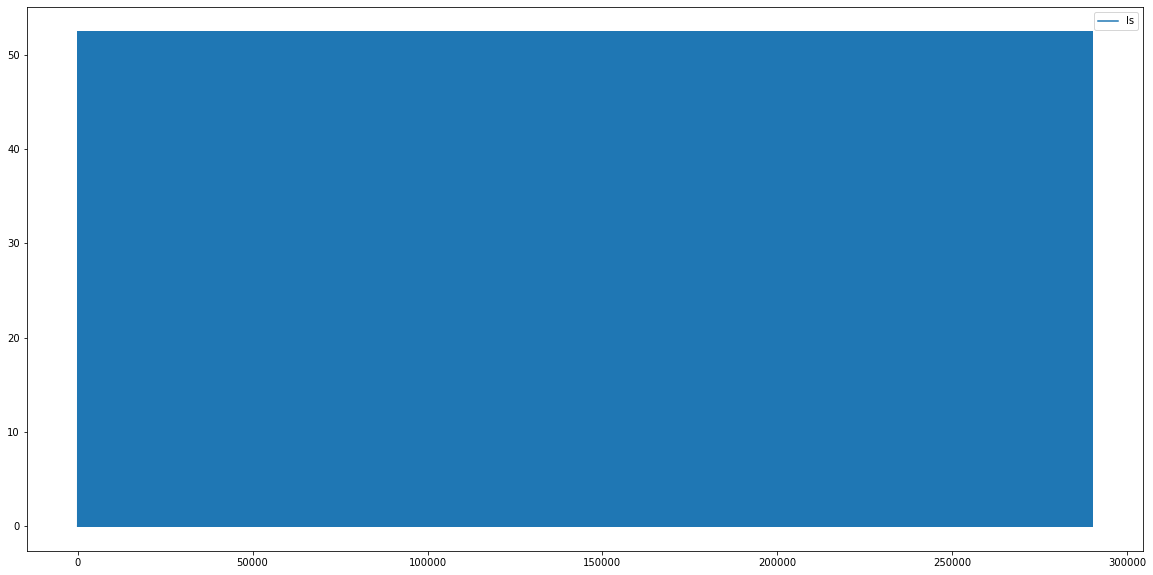

In [19]:
plt.figure(figsize = (20, 10))
# sedout.dfspot.plot(label = 'dfspot')
# sedout.dfs.plot(label = 'dfs')
# sedout.sc.plot(label = 'sc')
sedout.ls.plot(label = 'ls')

plt.legend()

In [10]:
sedout.dfs.sum()/33


54.00947528835228

In [11]:
len(sedout[sedout.ls>0])


12083

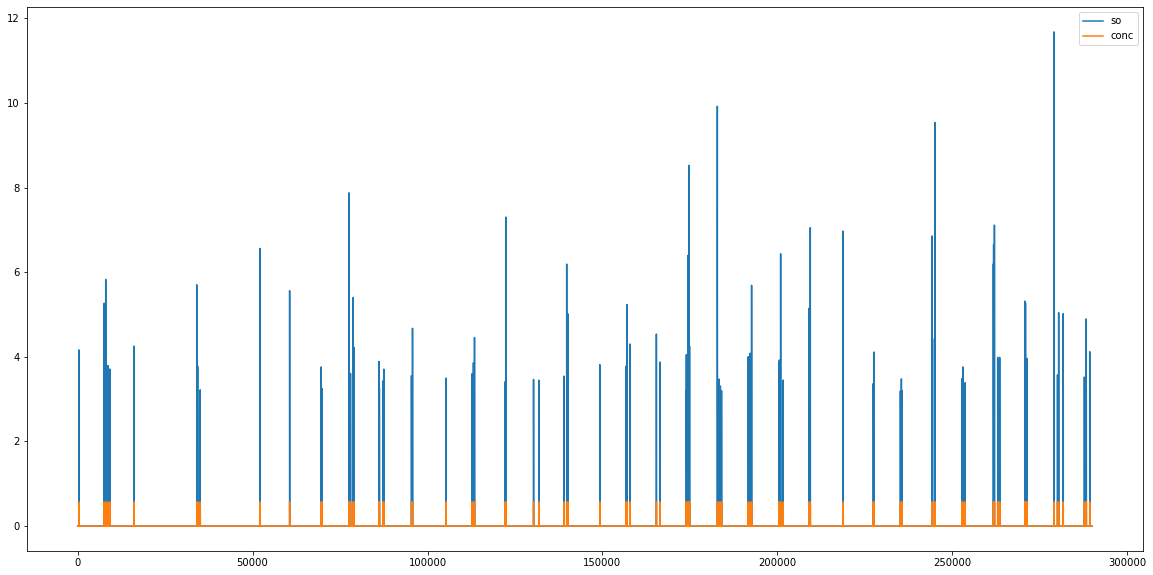

In [12]:
plt.figure(figsize = (20, 10))
# sedout.sopot.plot(label = 'sopot')

# sedout.Qstl.plot(label = 'Qstl')
sedout.so.plot(label = 'so')
sedout.conc.plot(label = 'conc')

# sedout.Qdftl.plot(label = 'Qdftl')

plt.legend()

In [13]:
# count flood hours
len(sedout[sedout.so>0])
 
# # count df hours
# sedout.so(sedout.sopot>0).count()

394

In [14]:
# count df hours - this is TL case 
len(sedout[sedout.sopot>0])

394

In [15]:
len(sedout[sedout.conc==0])


289598

# test for the df vs dfspot count 


In [24]:
# iterate over all files 
# to see if df column and dfspot are the same everywhere ir now 

def calculation(df):
    df = df[['dfspot', 'dfs']]
    df['diff_df'] = df.dfspot - df.dfs
    return df

In [36]:
path = '/Volumes/Extreme SSD/202409_paper2_modelruns/30years/SL_once/1landcover_30percent/langtang_climate_cut'

# path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut'



forplot_df = pd.DataFrame()

# Iterate over the files in the folders
for folder_name in os.listdir(path):
        # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(path, folder_name, 'Sediment.out') #create a path to file 
    output_df = pd.read_csv(file_path)
    output_df = calculation(output_df)
    forplot_df[folder_name] = output_df['diff_df'].values




/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_9973/3394610607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_df'] = df.dfspot - df.dfs


<AxesSubplot:>

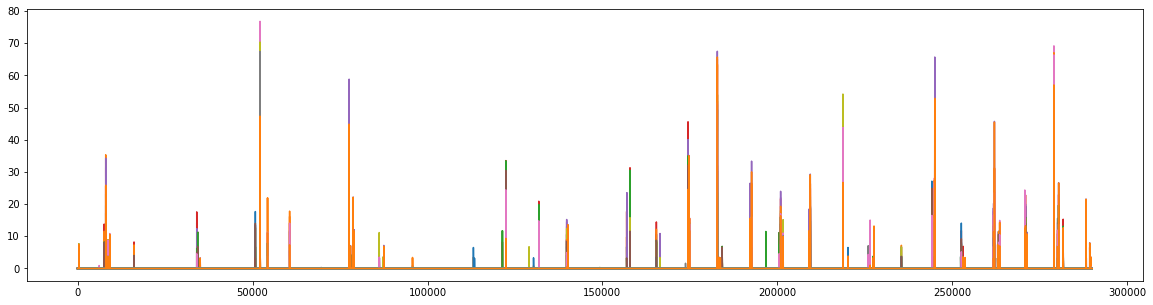

In [37]:


forplot_df.plot(legend = False, figsize = (20, 5))
